# Saddle Road Spike Removal Test

In [7]:
import matplotlib

matplotlib.use("module://ipympl.backend_nbagg")
import hilltoppy
import hydro_processing_tools.data_acquisition as data_acquisition
import hydro_processing_tools.utilities as utilities
import matplotlib.pyplot as plt

In [8]:
base_url = "http://tsdata.horizons.govt.nz/"
hts = "boo.hts"
site = "Saddle Road"
measurement = "Groundwater"
from_date = "2021-01-01 00:00"
to_date = "2023-10-12 8:30"
dtl_method = "trend"

In [9]:
data = data_acquisition.get_data(
    base_url, hts, site, measurement, from_date, to_date, dtl_method
)
display(data)

,SiteName,MeasurementName,Time,Value
0,Saddle Road,Groundwater,2021-01-01 00:00:00,2058
1,Saddle Road,Groundwater,2021-01-01 00:15:00,2058
2,Saddle Road,Groundwater,2021-01-01 00:30:00,2057
3,Saddle Road,Groundwater,2021-01-01 00:45:00,2057
4,Saddle Road,Groundwater,2021-01-01 01:00:00,2057
...,...,...,...,...
97363,Saddle Road,Groundwater,2023-10-12 07:30:00,3116
97364,Saddle Road,Groundwater,2023-10-12 07:45:00,3117
97365,Saddle Road,Groundwater,2023-10-12 08:00:00,3115
97366,Saddle Road,Groundwater,2023-10-12 08:15:00,3115


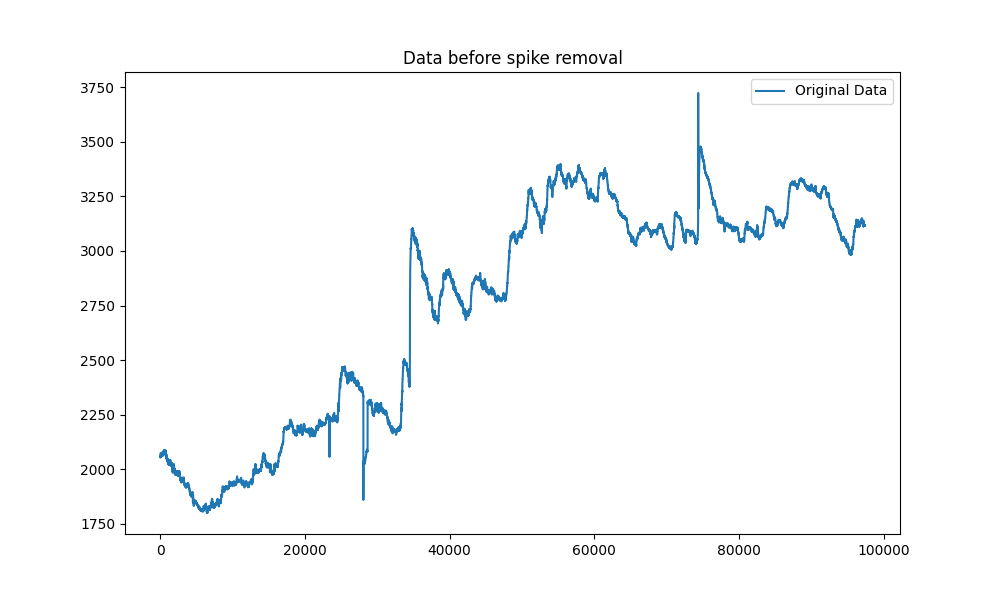

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(data["Value"], label="Original Data")
plt.title("Data before spike removal")
plt.legend()

## Spike removal parameters

In [12]:
span = 10
high_clip = 3500
low_clip = 0
delta = 500

In [13]:
clip_data = smooth.clip(data["Value"], high_clip, low_clip)

0    2058
1    2058
2    2057
3    2057
4    2057
Name: Value, dtype: int64
<class 'pandas.core.series.Series'>


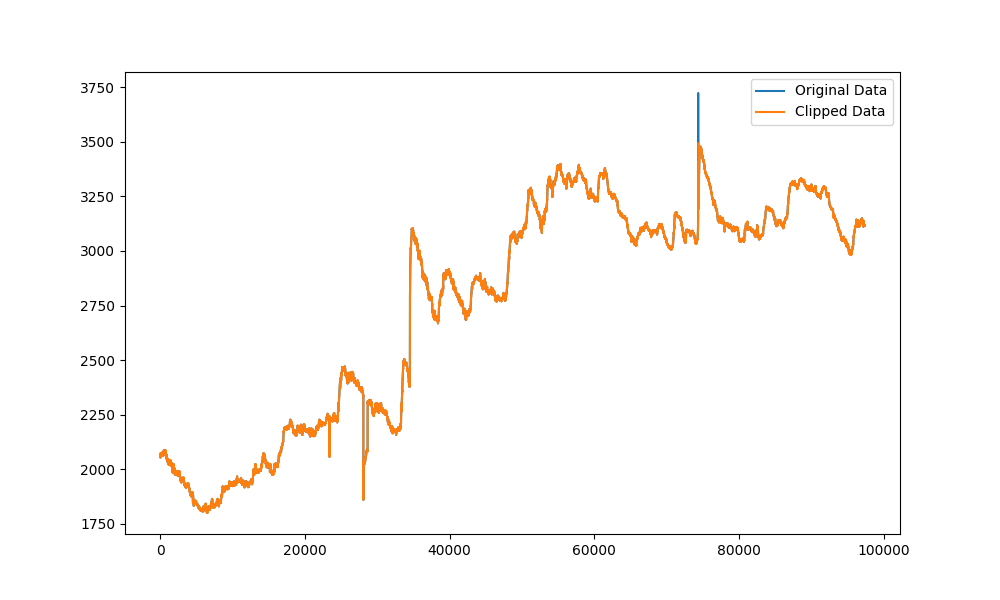

In [14]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(data["Value"], label="Original Data")
plt.plot(clip_data, label="Clipped Data")
plt.legend()

In [15]:
fbewma_data = smooth.fbewma(clip_data, span)

<class 'pandas.core.series.Series'>


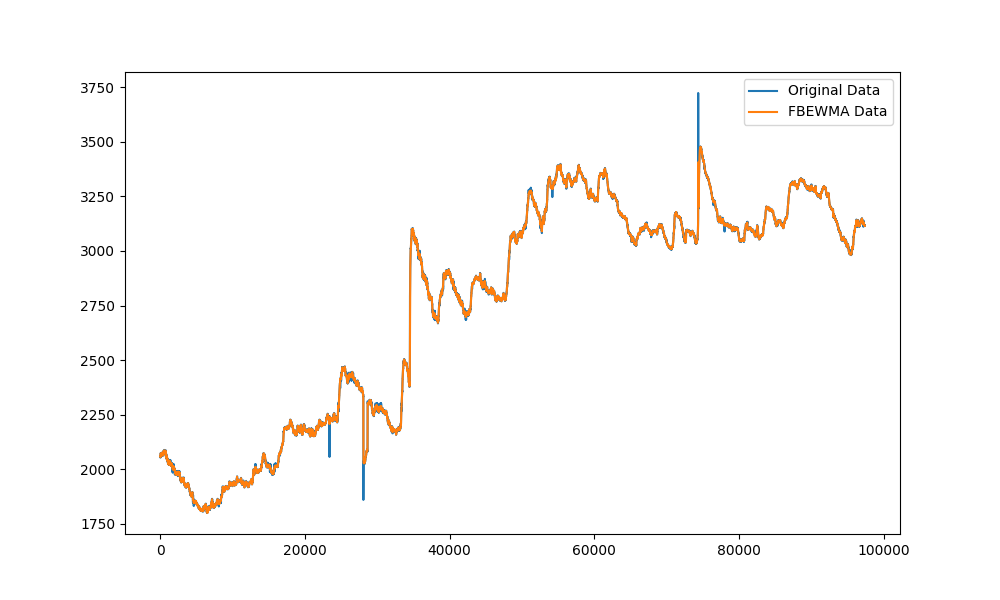

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(data["Value"], label="Original Data")
plt.plot(fbewma_data, label="FBEWMA Data")
plt.legend()